este é uma versao do stabble diffusion, substitui o serviço gradio pelo ngrok, e oculta todo tipo de historico de geraçao de imagem da celula, para evitar suspensoes.




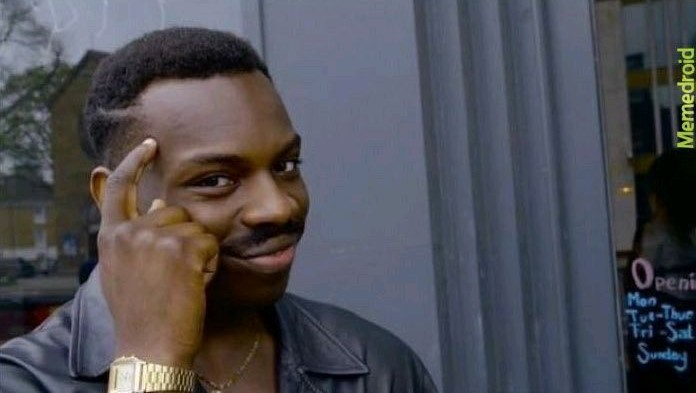

In [1]:
# @title Instalar requisitos ⚙️
# Clone o repositório do Stable Diffusion WebUI
!git clone https://github.com/AUTOMATIC1111/stable-diffusion-webui.git

# Instalar os requisitos
!pip install -r /content/stable-diffusion-webui/requirements.txt



fatal: destination path 'stable-diffusion-webui' already exists and is not an empty directory.


In [2]:
# @title Inserir link para download de modelos checkpoint
!pip install tqdm
import os
import requests
from tqdm import tqdm
from urllib.parse import urlparse

# Função para criar diretórios se não existirem
def create_directory(path):
    if not os.path.exists(path):
        os.makedirs(path)
        print(f"Pasta {path} criada com sucesso!")
    else:
        print(f"Pasta {path} já existe.")

# Função para obter o nome correto do arquivo a partir do cabeçalho da resposta
def get_filename_from_response(response, model_url):
    # Primeiro, tentamos obter o nome do arquivo do cabeçalho 'Content-Disposition'
    if 'content-disposition' in response.headers:
        content_disposition = response.headers['content-disposition']
        if 'filename=' in content_disposition:
            # Extraindo o nome do arquivo entre aspas ou após 'filename='
            filename = content_disposition.split('filename=')[-1].strip('"')
            return filename

    # Caso não haja 'Content-Disposition', usamos o nome da URL
    return os.path.basename(urlparse(model_url).path)

# Função para baixar o modelo de checkpoint com barra de progresso
def download_model_with_progress(model_url, api_key=None):
    # Criar diretório para modelos de checkpoint
    create_directory("/content/stable-diffusion-webui/models/Stable-diffusion")

    # Headers para incluir a API Key se for necessário
    headers = {}
    if api_key:
        headers = {'Authorization': f'Bearer {api_key}'}

    # Realizar o download com requests e tqdm
    response = requests.get(model_url, stream=True, headers=headers)

    # Verificar se o acesso é permitido
    if response.status_code == 401:  # Unauthorized (API key needed)
        print("Acesso negado! A chave da API do Civitai é necessária.")
        return

    # Obter o nome do arquivo corretamente
    model_name = get_filename_from_response(response, model_url)

    # Caminho completo do arquivo a ser salvo
    model_path = os.path.join("/content/stable-diffusion-webui/models/Stable-diffusion", model_name)

    # Exibir mensagem de download
    print(f"Baixando o modelo {model_name} de {model_url}...")

    total_size = int(response.headers.get('content-length', 0))

    # Usar tqdm para a barra de progresso
    with open(model_path, 'wb') as file, tqdm(
        desc=model_name,
        total=total_size,
        unit='iB',
        unit_scale=True,
        unit_divisor=1024,
    ) as bar:
        for data in response.iter_content(chunk_size=1024):
            file.write(data)
            bar.update(len(data))

    print(f"\nModelo {model_name} salvo em {model_path}.")

# Função para detectar se a URL é do Civitai
def is_civitai_url(model_url):
    parsed_url = urlparse(model_url)
    return "civitai.com" in parsed_url.netloc

# Campo para o usuário inserir a URL do modelo
model_url = input("Insira o link de download do modelo: ")

# Verificar se a URL é do Civitai e se precisa de chave API
if is_civitai_url(model_url):
    api_key = input("Insira a chave API do Civitai (se não precisar, pressione Enter): ")
    download_model_with_progress(model_url, api_key)
else:
    download_model_with_progress(model_url)


Insira o link de download do modelo: https://civitai.com/api/download/models/1113?type=Model&format=PickleTensor&size=full&fp=fp16
Insira a chave API do Civitai (se não precisar, pressione Enter): 
Pasta /content/stable-diffusion-webui/models/Stable-diffusion já existe.
Baixando o modelo jaggy_v1.ckpt de https://civitai.com/api/download/models/1113?type=Model&format=PickleTensor&size=full&fp=fp16...


jaggy_v1.ckpt: 100%|██████████| 1.99G/1.99G [00:45<00:00, 46.6MiB/s]


Modelo jaggy_v1.ckpt salvo em /content/stable-diffusion-webui/models/Stable-diffusion/jaggy_v1.ckpt.


In [3]:
# @title Inserir link para download de modelos lora
!pip install tqdm
import os
import requests
from tqdm import tqdm
from urllib.parse import urlparse

# Função para criar diretórios se não existirem
def create_directory(path):
    if not os.path.exists(path):
        os.makedirs(path)
        print(f"Pasta {path} criada com sucesso!")
    else:
        print(f"Pasta {path} já existe.")

# Função para obter o nome correto do arquivo a partir do cabeçalho da resposta
def get_filename_from_response(response, model_url):
    # Primeiro, tentamos obter o nome do arquivo do cabeçalho 'Content-Disposition'
    if 'content-disposition' in response.headers:
        content_disposition = response.headers['content-disposition']
        if 'filename=' in content_disposition:
            # Extraindo o nome do arquivo entre aspas ou após 'filename='
            filename = content_disposition.split('filename=')[-1].strip('"')
            return filename

    # Caso não haja 'Content-Disposition', usamos o nome da URL
    return os.path.basename(urlparse(model_url).path)

# Função para baixar o modelo de checkpoint com barra de progresso
def download_model_with_progress(model_url, api_key=None):
    # Criar diretório para modelos de checkpoint
    create_directory("/content/stable-diffusion-webui/models/Lora")

    # Headers para incluir a API Key se for necessário
    headers = {}
    if api_key:
        headers = {'Authorization': f'Bearer {api_key}'}

    # Realizar o download com requests e tqdm
    response = requests.get(model_url, stream=True, headers=headers)

    # Verificar se o acesso é permitido
    if response.status_code == 401:  # Unauthorized (API key needed)
        print("Acesso negado! A chave da API do Civitai é necessária.")
        return

    # Obter o nome do arquivo corretamente
    model_name = get_filename_from_response(response, model_url)

    # Caminho completo do arquivo a ser salvo
    model_path = os.path.join("/content/stable-diffusion-webui/models/Lora", model_name)

    # Exibir mensagem de download
    print(f"Baixando o modelo {model_name} de {model_url}...")

    total_size = int(response.headers.get('content-length', 0))

    # Usar tqdm para a barra de progresso
    with open(model_path, 'wb') as file, tqdm(
        desc=model_name,
        total=total_size,
        unit='iB',
        unit_scale=True,
        unit_divisor=1024,
    ) as bar:
        for data in response.iter_content(chunk_size=1024):
            file.write(data)
            bar.update(len(data))

    print(f"\nModelo {model_name} salvo em {model_path}.")

# Função para detectar se a URL é do Civitai
def is_civitai_url(model_url):
    parsed_url = urlparse(model_url)
    return "civitai.com" in parsed_url.netloc

# Campo para o usuário inserir a URL do modelo
model_url = input("Insira o link de download do modelo: ")

# Verificar se a URL é do Civitai e se precisa de chave API
if is_civitai_url(model_url):
    api_key = input("Insira a chave API do Civitai (se não precisar, pressione Enter): ")
    download_model_with_progress(model_url, api_key)
else:
    download_model_with_progress(model_url)


Insira o link de download do modelo: https://civitai.com/api/download/models/60568?type=Model&format=SafeTensor
Insira a chave API do Civitai (se não precisar, pressione Enter): 
Pasta /content/stable-diffusion-webui/models/Lora criada com sucesso!
Baixando o modelo animemix_v3_offset.safetensors de https://civitai.com/api/download/models/60568?type=Model&format=SafeTensor...


animemix_v3_offset.safetensors: 100%|██████████| 144M/144M [00:04<00:00, 34.6MiB/s]


Modelo animemix_v3_offset.safetensors salvo em /content/stable-diffusion-webui/models/Lora/animemix_v3_offset.safetensors.


In [5]:
#@markdown ###🟢 Conectar ao Ngrok
#@markdown Insira seu token do Ngrok abaixo:

Ngrok_token = ""  # @param {type:"string"}
Ngrok_domain = ""  # Opcional, deixe vazio se não tiver um domínio
port = 7860
HOME_FOLDER = "/kaggle"

# -----------------

!pip install pyngrok==6.1.0  # Downgrade para uma versão que suporta o tunneling do ngrok

from pyngrok import ngrok
import gc
import sys
import os

# Função para ocultar saídas (histórico de imagens e prompts)
class HiddenPrints:
    def __enter__(self):
        self._original_stdout = sys.stdout  # Guardar a saída original
        sys.stdout = open(os.devnull, 'w')  # Redirecionar saída para devnull

    def __exit__(self, exc_type, exc_val, exc_tb):
        sys.stdout.close()  # Fechar devnull
        sys.stdout = self._original_stdout  # Restaurar a saída original

gc.collect()

# Verificar se o token foi inserido
if Ngrok_token.strip():
    try:
        ngrok.set_auth_token(Ngrok_token)
        ngrok.kill()  # Finalizar conexões existentes
        srv = ngrok.connect(port)  # Conectar na porta especificada
        print(f"Túnel ngrok ativo em: {srv.public_url}")

        # Comando para iniciar o Stable Diffusion WebUI, ocultando o histórico
        with HiddenPrints():  # Ocultar histórico de geração de imagem
            !echo -e "A\nN" | python /content/stable-diffusion-webui/launch.py

    except Exception as e:
        print(f"Erro ao iniciar o túnel ngrok: {e}")
else:
    print('Um token ngrok é necessário. Cadastre-se em https://ngrok.com e insira o token acima.')


Túnel ngrok ativo em: https://2f68-34-16-193-134.ngrok-free.app
